# Importing Libraries

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Test set Image Processing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 7352 files belonging to 3 classes.
['Healthy_Leaf_Rose', 'Rose_Rust', 'Rose_sawfly_Rose_slug']


# Loading Model

In [24]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

In [25]:
cnn.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

#Visualising and Performing Prediction on Single image

In [26]:
!pip install opencv-python


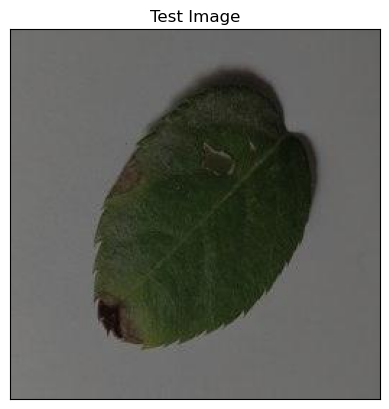

In [27]:
#Test Image Visualization
import cv2
image_path = 'test/Rose_Rust/brightened_IMG_20230703_213531.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [28]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


In [29]:
print(predictions)

[[7.1455448e-05 9.9964619e-01 2.8240378e-04]]


In [30]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

1


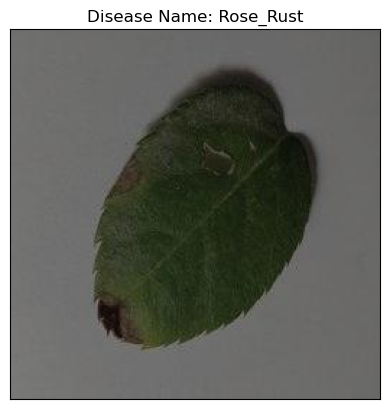

In [31]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()